# TASK1 - PREDICTION USING SUPERVISED MACHINE LEARNING

# Problem statement: Predict the percentage of a student based on number of study hours

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


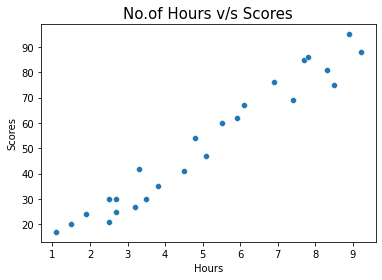

In [5]:
#We are having numerical variables,so let's go for scatter plot to see how they are correlated
sns.scatterplot(x = "Hours", y = "Scores", data = df)
plt.title("No.of Hours v/s Scores",fontsize=15)
plt.show()

In [6]:
#Regression analysis
#Independant variable "X"
#Dependant variable is "y"
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [7]:
#Split the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20, 1) (20,)
(5, 1) (5,)


In [8]:
#Let's build simple linear regression model
regression_model=linear_model.LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

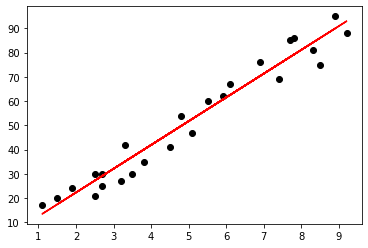

In [9]:
# Plotting the regression line
line = regression_model.coef_*X+regression_model.intercept_
plt.scatter(X, y,color="black")
plt.plot(X, line,"-r");
plt.show()

In [10]:
r_squared = regression_model.score(X_train, y_train)
print(r_squared)
#We calculated R2 value to see how well response variable is explained by the predictor.It ranges from 0 to 1.
#If it's close to 1 then response variable explained by indepndant variable perfectly.

0.95807022445042


In [11]:
#Predicting scores for test dataset
Predicted=regression_model.predict(X_test)
Predicted

array([17.37142335, 52.70292295, 35.03717315, 34.05574261, 46.81433968])

In [12]:
df1=pd.DataFrame({"Actual_scores":y_test,"Predicted_scores":Predicted})
df1

,Actual_scores,Predicted_scores
0,20,17.371423
1,47,52.702923
2,42,35.037173
3,27,34.055743
4,41,46.814340


In [13]:
hours=np.array(9.25)
hours=hours.reshape(-1,1)
regression_model.predict(hours)

array([93.43229054])